In [ ]:
!kaggle datasets download -d baltacifatih/turkish-lira-banknote-dataset

from zipfile import ZipFile
import os
try:
    os.mkdir('data')
except:
    print('Dosya oluşturulmadı')
for i in os.listdir('C:/Users/mehmu/Desktop/PyProjects/Projects/github repo/BanknoteClassifier'):
    if '.zip' in i:
        print(i)
        !cd C:/Users/mehmu/Desktop/PyProjects/Projects/github repo/BanknoteClassifier/data
        with ZipFile(i, 'r') as zipObj:
            zipObj.extractall()
        os.remove(i)

In [1]:
import pandas as pd 
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import warnings

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow import keras
import tensorflow 

import scipy
print("Num GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))


# Set the seed value for experiment reproduci.bility.
seed = 1842
tensorflow.random.set_seed(seed)
np.random.seed(seed)
# Turn off warnings for cleaner looking notebook
warnings.simplefilter('ignore')


Num GPUs Available:  1


In [ ]:
%cd C:\Users\mehmu\Desktop\PyProjects\Projects\github repo\BanknoteClassifier

In [2]:

image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2) #shear_range =.25, zoom_range =.2, horizontal_flip = True, rotation_range=20)     


train_dataset = image_generator.flow_from_directory(batch_size=8,
                                                    directory='data',
                                                    shuffle=True,
                                                    target_size=(256,256), 
                                                    subset="training",
                                                    class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=8,
                                                    directory='data/',
                                                    shuffle=True,
                                                    target_size=(256,256), 
                                                    class_mode='categorical')

Found 4800 images belonging to 6 classes.
Found 6000 images belonging to 6 classes.


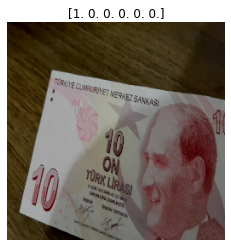

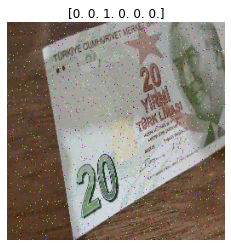

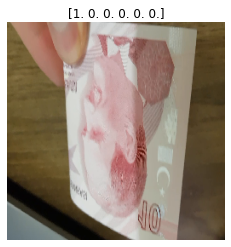

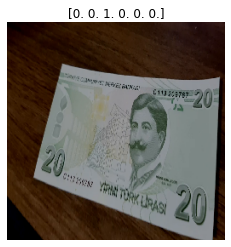

In [3]:
batch_1_img = train_dataset[0]
for i in range(0,4):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.imshow(img)
    plt.title(lab)
    plt.axis('off')
    plt.show()

In [31]:
#experiment with Convolutional neural net
model = keras.models.Sequential([
keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = [256,256,3]),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.MaxPooling2D(),
keras.layers.Conv2D(64, (2, 2), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(6, activation ='softmax')])

model.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc'),'acc'])
callback = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True),
            keras.callbacks.ModelCheckpoint('model.pth',
                                            monitor="val_loss",
                                            save_best_only=True,
                                            )]
model.fit(train_dataset, epochs=50, validation_data=validation_dataset, callbacks=callback)

Epoch 1/50
600/600 [==============================] - 174s 288ms/step - loss: 1.1574 - auc: 0.9026 - acc: 0.6263 - val_loss: 0.6347 - val_auc: 0.9653 - val_acc: 0.7630
Epoch 2/50
600/600 [==============================] - 173s 288ms/step - loss: 0.4262 - auc: 0.9807 - acc: 0.8487 - val_loss: 2.2488 - val_auc: 0.8378 - val_acc: 0.5693
Epoch 3/50
600/600 [==============================] - 172s 287ms/step - loss: 0.2833 - auc: 0.9905 - acc: 0.9110 - val_loss: 0.2394 - val_auc: 0.9929 - val_acc: 0.9242
Epoch 4/50
600/600 [==============================] - 173s 289ms/step - loss: 0.1314 - auc: 0.9971 - acc: 0.9602 - val_loss: 0.1137 - val_auc: 0.9974 - val_acc: 0.9717
Epoch 5/50
600/600 [==============================] - 172s 286ms/step - loss: 0.1324 - auc: 0.9969 - acc: 0.9550 - val_loss: 0.3412 - val_auc: 0.9878 - val_acc: 0.8843
Epoch 6/50
600/600 [==============================] - 172s 286ms/step - loss: 0.1351 - auc: 0.9967 - acc: 0.9550 - val_loss: 0.1897 - val_auc: 0.9944 - val_acc:

In [32]:
loss, auc, accuracy = model.evaluate(validation_dataset)
print("Loss: ", loss)
print("AUC: ", auc)
print("Accuracy: ", accuracy)

750/750 [==============================] - 89s 118ms/step - loss: 0.0451 - auc: 0.9983 - acc: 0.9937
Loss:  0.04508901387453079
AUC:  0.9983226656913757
Accuracy:  0.9936666488647461
